#Imports

In [1]:
import numpy as np
from tensorflow import keras
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
import matplotlib.pyplot as plt
import pandas as pd
import warnings

#Data

In [2]:
num_classes = 10 # 0 1 2 3 4 5 6 7 8 9
input_shape = (28, 28, 1) #width 28, height 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Plot

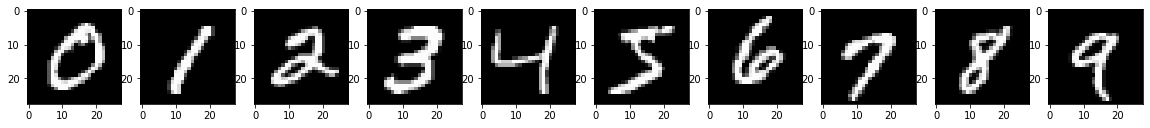

In [5]:
fig, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')

#Prepare Data

In [6]:
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [7]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
print(y_train[0:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [9]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [10]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [11]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


#Model

In [31]:
model = keras.Sequential(
    [
      Conv2D(75, kernel_size=(3, 3), padding='same', activation="relu", input_shape=input_shape),
      BatchNormalization(),
      MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),

      Conv2D(50, kernel_size=(3, 3), padding ='same', activation="relu"),
      Dropout(0.2),
      BatchNormalization(),
      MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),

      Conv2D(25, kernel_size=(3, 3), padding='same', activation="relu"),
      BatchNormalization(),
      MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),


      Flatten(),
      Dense(256, activation="relu"),
      Dropout(0.3),
     
      Dense(num_classes, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 75)       300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 14, 14, 50)      

In [32]:
epochs = 30

history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 13s 9ms/step - loss: 0.1588 - accuracy: 0.9509 - val_loss: 0.0677 - val_accuracy: 0.9785
Epoch 2/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0643 - accuracy: 0.9800 - val_loss: 0.0661 - val_accuracy: 0.9791
Epoch 3/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0474 - accuracy: 0.9847 - val_loss: 0.0424 - val_accuracy: 0.9869
Epoch 4/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0381 - accuracy: 0.9875 - val_loss: 0.0433 - val_accuracy: 0.9881
Epoch 5/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0440 - val_accuracy: 0.9881
Epoch 6/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0447 - val_accuracy: 0.9871
Epoch 7/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0273 - accuracy: 0.9917 - val_loss: 0.0406 - val_accuracy

#Evaluate

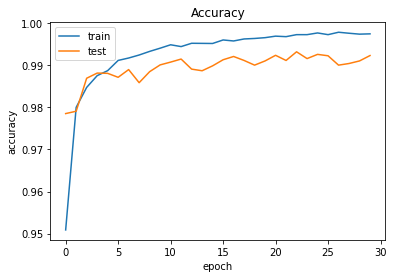

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

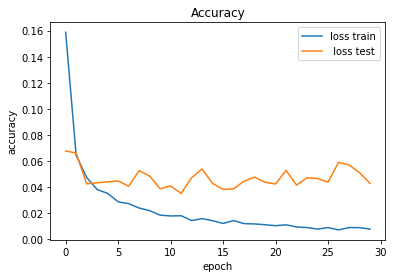

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['loss train',' loss test'])

plt.show()

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03478105366230011
Test accuracy: 0.9923999905586243


#Metrics

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [37]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
predict = model.predict(x_test)

In [39]:
predict

array([[1.8797138e-21, 5.3838229e-16, 2.1200042e-17, ..., 1.0000000e+00,
        5.4696669e-17, 1.0260919e-14],
       [4.0333331e-21, 6.8947831e-19, 1.0000000e+00, ..., 1.4180200e-24,
        4.3947211e-22, 3.3616361e-25],
       [1.9538993e-14, 1.0000000e+00, 9.1199376e-18, ..., 4.8559860e-14,
        5.1518387e-17, 1.4908121e-18],
       ...,
       [3.2185651e-34, 2.0636979e-21, 2.5791069e-26, ..., 2.9367292e-24,
        1.7737315e-23, 2.0676979e-24],
       [7.6055613e-25, 6.1592926e-24, 2.0141260e-27, ..., 2.1961121e-25,
        7.5954910e-20, 1.1193236e-22],
       [4.7708909e-10, 2.1212654e-14, 3.3140331e-15, ..., 1.4920641e-25,
        4.4157932e-15, 5.3698755e-16]], dtype=float32)

In [40]:
predict_classes = np.argmax(predict, axis=1)

In [41]:
predict_classes

array([7, 2, 1, ..., 4, 5, 6])

##Accuracy

In [42]:
print(accuracy_score(np.argmax(y_test, axis=1), predict_classes))

0.9924


##Confusion Matrix

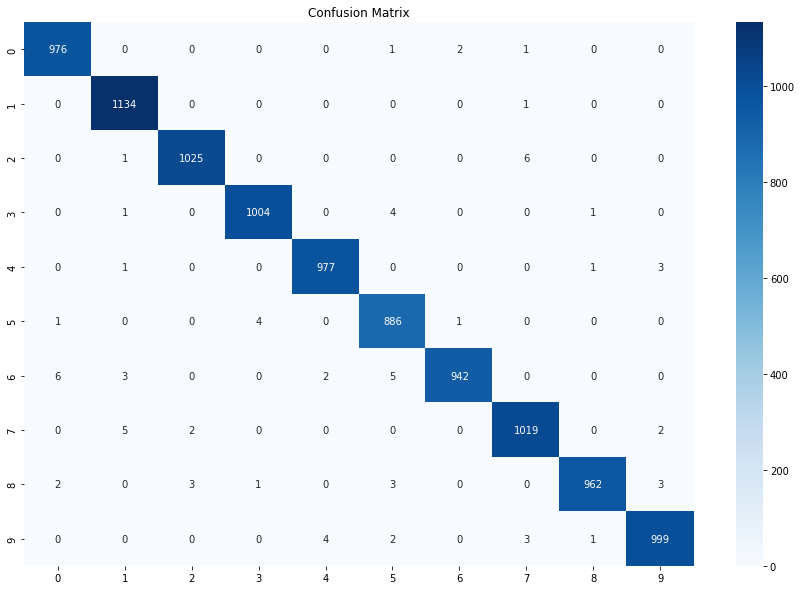

In [43]:
# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), predict_classes), annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_title('Confusion Matrix');

# Save

In [44]:
model.save('model.h5', save_format='h5')

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Submission

In [26]:
''' sample_submission = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv') '''

" sample_submission = pd.read_csv('sample_submission.csv')\ntest = pd.read_csv('test.csv') "

In [27]:
''' x_test_sub = test.values.reshape(-1, 28,28,1)
x_test_sub = x_test_sub / 255
x_test_sub.shape '''

' x_test_sub = test.values.reshape(-1, 28,28,1)\nx_test_sub = x_test_sub / 255\nx_test_sub.shape '

In [28]:
''' predict_sub = model.predict(x_test_sub)
predict_sub = np.argmax(predict_sub, -1) '''

' predict_sub = model.predict(x_test_sub)\npredict_sub = np.argmax(predict_sub, -1) '

In [29]:
''' predict_sub[:10] '''

' predict_sub[:10] '

In [30]:
''' sample_submission['Label'] = predict_sub
sample_submission.to_csv('submission.csv', index=False) '''

" sample_submission['Label'] = predict_sub\nsample_submission.to_csv('submission.csv', index=False) "